In [809]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the data

In [810]:
#Read the data
bikes = pd.read_csv('day.csv')
bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [811]:
# Checking the details of the dataset
bikes.shape

(730, 16)

In [812]:
# Check the numeric variables
bikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [813]:
#Check if any null values
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [814]:
#drop the unnecessary columns as a part of cleaning the data
bikes = bikes.drop(['dteday','instant','casual','registered'],axis = 1)
bikes.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [815]:
# convert the data types of categorical variables
#bikes['yr'] = bikes['yr'].astype('object')
#bikes['holiday'] = bikes['holiday'].astype('object')
#bikes['weekday'] = bikes['weekday'].astype('object')
#bikes['workingday'] = bikes['workingday'].astype('object')
#bikes['weathersit'] = bikes['weathersit'].astype('object')
#bikes.info()

In [816]:
# convert the data to meaningful categories
# First check the values before conversion
bikes['season'].value_counts()
bikes['yr'].value_counts()
bikes['mnth'].value_counts()
bikes['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [817]:
#Change the categories for the categorical variables
bikes['season'] = bikes['season'].map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})
bikes['yr'] = bikes['yr'].map({0 : '2018s', 1 : '2019s'})
bikes['mnth'] = bikes['mnth'].map({1 : 'Jan', 2 : 'Feb',3 :'Mar',4 :'Apr', 5 :'May', 6 :'Jun', 7 :'Jul', 8 :'Aug', 9: 'Sep', 10 : 'Oct', 11: 'Nov', 12: 'Dec'})
bikes['weathersit'] = bikes['weathersit'].map({1 : 'Clear', 2: 'Mist', 3: 'LightSnow', 4: 'HeavyRain'})

In [818]:
# Then check the values after conversion
bikes['season'].value_counts()
bikes['yr'].value_counts()
bikes['mnth'].value_counts()
bikes['weathersit'].value_counts()

Clear        463
Mist         246
LightSnow     21
Name: weathersit, dtype: int64

In [819]:
# Check info after conversion of data types
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


<Figure size 720x576 with 0 Axes>

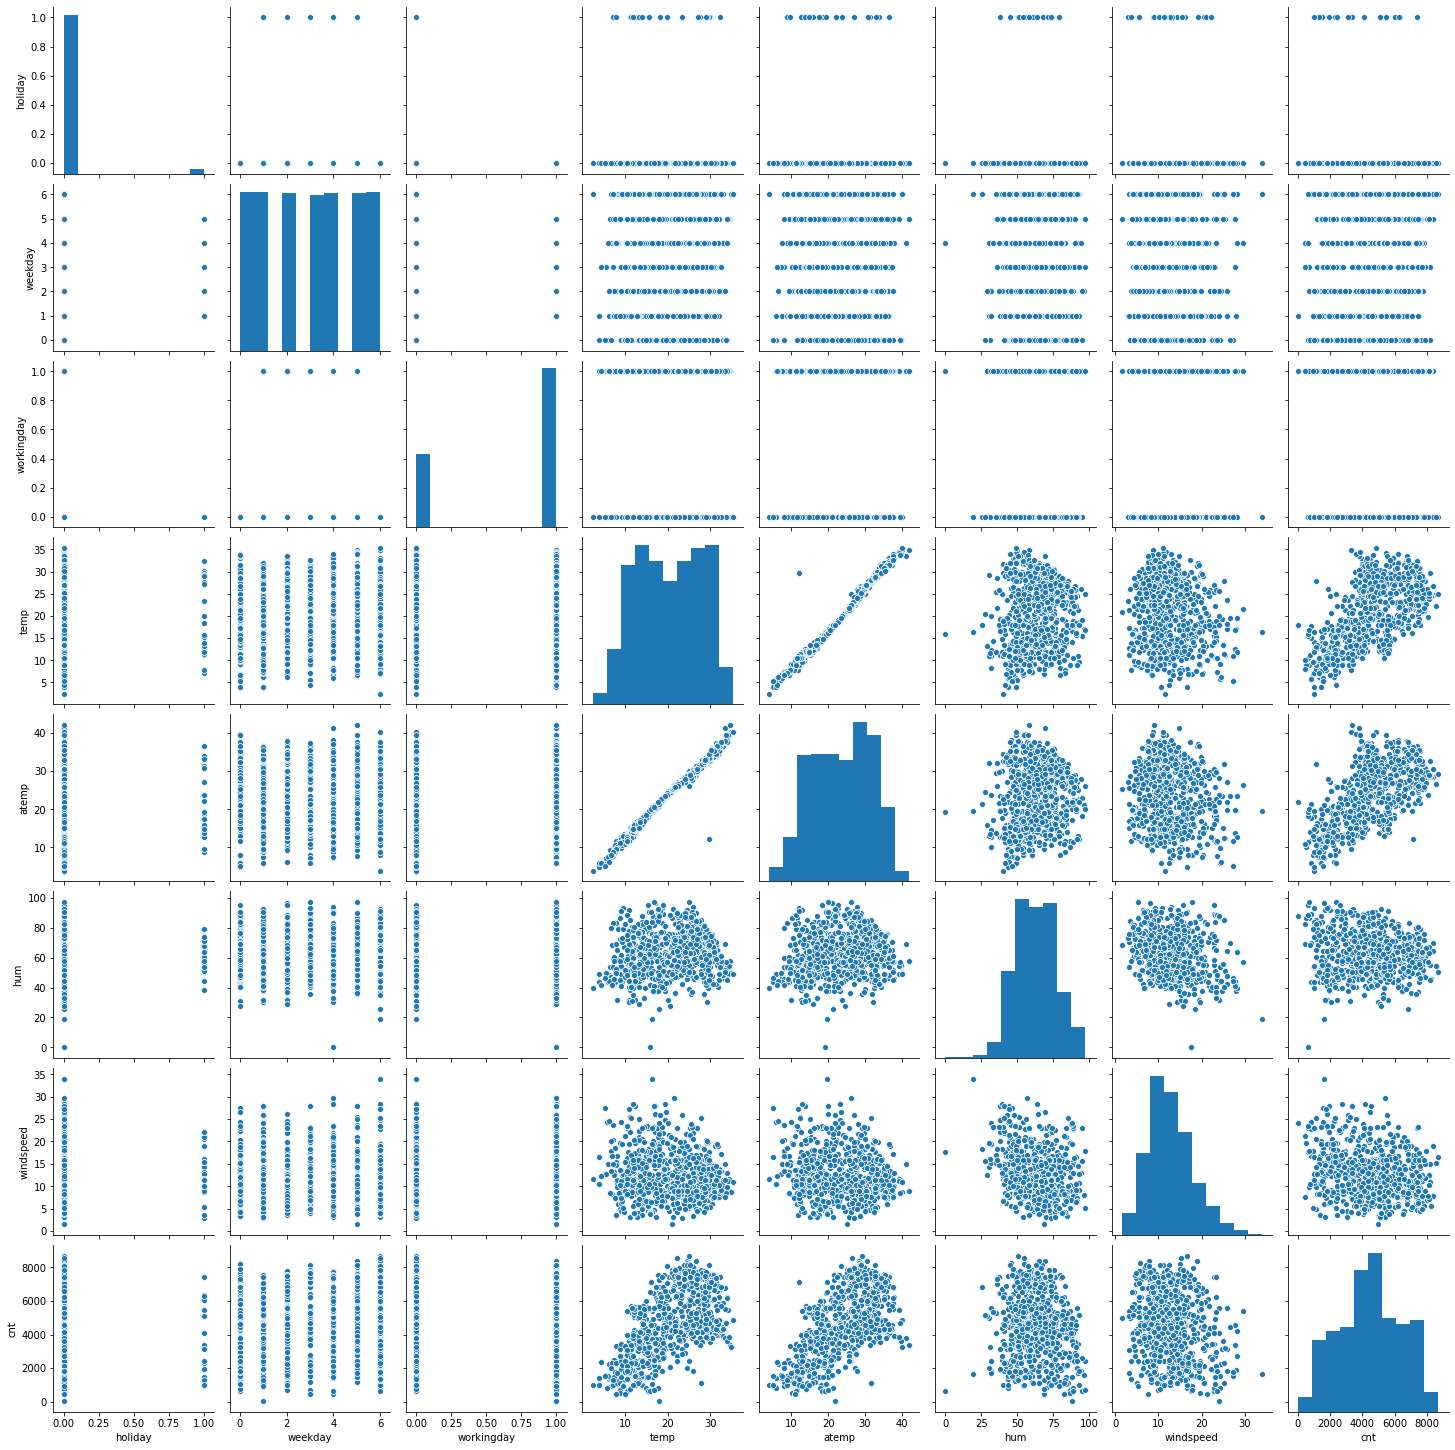

In [820]:
#create a pairplot to see the relations of the columns
# Temperature (temp) and Actual Temperature (atemp) fields have a good linear releationship with the cnt variable
plt.figure(figsize = (10,8))
sns.pairplot(bikes)
plt.show()

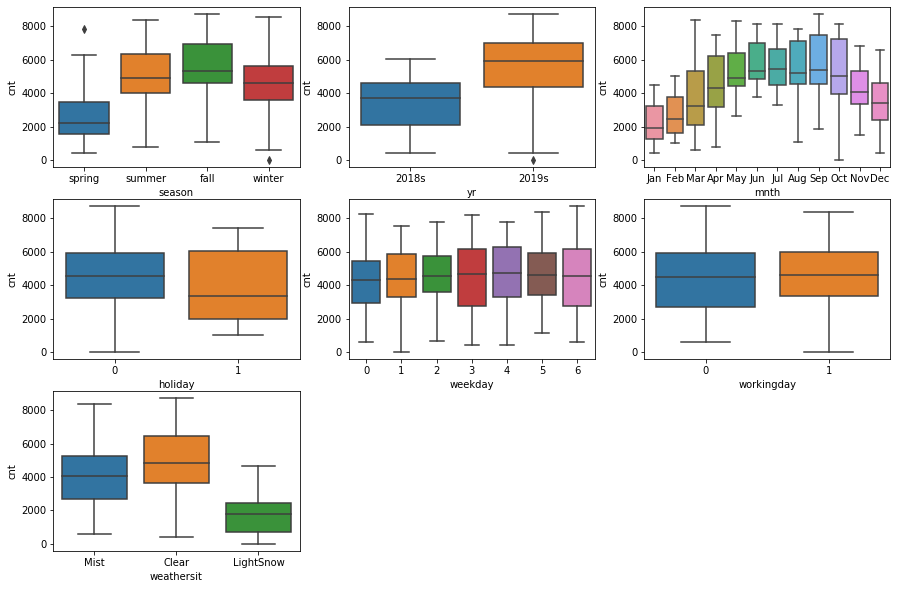

In [821]:
#boxplot for categorical variables
plt.figure (figsize = (15,10))
plt.subplot(3,3,1)
sns.boxplot(x = bikes.season, y = bikes.cnt, data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = bikes.yr, y = bikes.cnt, data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = bikes.mnth, y = bikes.cnt, data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = bikes.holiday, y = bikes.cnt, data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = bikes.weekday, y = bikes.cnt, data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = bikes.workingday, y = bikes.cnt, data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = bikes.weathersit, y = bikes.cnt, data = bikes)

# Preparing the data for Modelling:

In [822]:
# Create Dummy Variables and drop the first variable so that we have n-1 dummy variables
# Season
newSeason = pd.get_dummies(bikes['season'],drop_first = True)
newSeason.head()
# Year
newYr = pd.get_dummies(bikes['yr'],drop_first = True)
newYr.head()
# Month
newMnth = pd.get_dummies(bikes['mnth'], drop_first = True)
newMnth.head()
# Day of the week
newWeekDay = pd.get_dummies(bikes['weekday'], drop_first = True)
newWeekDay.head()
# Weather Situation
newWeathersit = pd.get_dummies(bikes['weathersit'],drop_first = True)
newWeathersit.head()

LightSnow  Mist
0          0     1
1          0     1
2          0     0
3          0     0
4          0     0

In [823]:
#Concat the dummy variables to the original dataframe bikes
bikes = pd.concat([bikes,newSeason,newYr,newMnth,newWeekDay,newWeathersit],axis = 1)
bikes.head()

season     yr mnth  holiday  weekday  workingday weathersit       temp  \
0  spring  2018s  Jan        0        6           0       Mist  14.110847   
1  spring  2018s  Jan        0        0           0       Mist  14.902598   
2  spring  2018s  Jan        0        1           1      Clear   8.050924   
3  spring  2018s  Jan        0        2           1      Clear   8.200000   
4  spring  2018s  Jan        0        3           1      Clear   9.305237   

      atemp      hum  ...  Oct  Sep  1  2  3  4  5  6  LightSnow  Mist  
0  18.18125  80.5833  ...    0    0  0  0  0  0  0  1          0     1  
1  17.68695  69.6087  ...    0    0  0  0  0  0  0  0          0     1  
2   9.47025  43.7273  ...    0    0  1  0  0  0  0  0          0     0  
3  10.60610  59.0435  ...    0    0  0  1  0  0  0  0          0     0  
4  11.46350  43.6957  ...    0    0  0  0  1  0  0  0          0     0  

[5 rows x 35 columns]

In [824]:
#remove the older categorical columns for which we created the dummy variables
bikes = bikes.drop(['season','yr','mnth','weekday','weathersit'], axis = 1)
bikes.head()

holiday  workingday       temp     atemp      hum  windspeed   cnt  spring  \
0        0           0  14.110847  18.18125  80.5833  10.749882   985       1   
1        0           0  14.902598  17.68695  69.6087  16.652113   801       1   
2        0           1   8.050924   9.47025  43.7273  16.636703  1349       1   
3        0           1   8.200000  10.60610  59.0435  10.739832  1562       1   
4        0           1   9.305237  11.46350  43.6957  12.522300  1600       1   

   summer  winter  ...  Oct  Sep  1  2  3  4  5  6  LightSnow  Mist  
0       0       0  ...    0    0  0  0  0  0  0  1          0     1  
1       0       0  ...    0    0  0  0  0  0  0  0          0     1  
2       0       0  ...    0    0  1  0  0  0  0  0          0     0  
3       0       0  ...    0    0  0  1  0  0  0  0          0     0  
4       0       0  ...    0    0  0  0  1  0  0  0          0     0  

[5 rows x 30 columns]

In [825]:
# splitting into train and test dataframes
df_train, df_test = train_test_split(bikes, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [826]:
# Rescaling of Variables for the training dataset
# check which variables need rescaling
bikes.describe()

holiday  workingday        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.028767    0.683562   20.319259   23.726322   62.765175   12.763620   
std      0.167266    0.465405    7.506729    8.150308   14.237589    5.195841   
min      0.000000    0.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    0.000000   13.811885   16.889713   52.000000    9.041650   
50%      0.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      0.000000    1.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    1.000000   35.328347   42.044800   97.250000   34.000021   

               cnt      spring      summer      winter  ...         Oct  \
count   730.000000  730.000000  730.000000  730.000000  ...  730.000000   
mean   4508.006849    0.246575    0.252055    0.243836  ...    0.084932   
std    1936.011647    0.431313    0.434490    0.429689  ...    0.278971   
min      22.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%    3169.750000    0.000000    0.000000    0.000000  ...    0.000000   
50%    4548.500000    0.000000    0.000000    0.000000  ...    0.000000   
75%    5966.000000    0.000000    1.000000    0.000000  ...    0.000000   
max    8714.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sep           1           2           3           4           5  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.082192    0.143836    0.142466    0.141096    0.142466    0.142466   
std      0.274845    0.351164    0.349767    0.348359    0.349767    0.349767   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6   LightSnow        Mist  
count  730.000000  730.000000  730.000000  
mean     0.143836    0.028767    0.336986  
std      0.351164    0.167266    0.473004  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [827]:
# scaling
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

holiday  workingday      temp     atemp       hum  windspeed       cnt  \
576        0           1  0.815169  0.766351  0.725633   0.264686  0.827658   
426        0           0  0.442393  0.438975  0.640189   0.255342  0.465255   
728        0           0  0.245101  0.200348  0.498067   0.663106  0.204096   
482        0           0  0.395666  0.391735  0.504508   0.188475  0.482973   
111        0           1  0.345824  0.318819  0.751824   0.380981  0.191095   

     spring  summer  winter  ...  Oct  Sep  1  2  3  4  5  6  LightSnow  Mist  
576       0       0       0  ...    0    0  0  1  0  0  0  0          0     0  
426       1       0       0  ...    0    0  0  0  0  0  0  1          0     1  
728       1       0       0  ...    0    0  0  0  0  0  0  0          0     0  
482       0       1       0  ...    0    0  0  0  0  0  0  1          0     1  
111       0       1       0  ...    0    0  0  0  0  0  1  0          0     1  

[5 rows x 30 columns]

In [828]:
# check if variables are scaled
df_train.describe()

holiday  workingday        temp       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.025490    0.676471    0.537440    0.513156    0.650480    0.320883   
std      0.157763    0.468282    0.225858    0.212410    0.145846    0.169803   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.339853    0.332086    0.538643    0.199179   
50%      0.000000    1.000000    0.542596    0.529718    0.653714    0.296763   
75%      0.000000    1.000000    0.735215    0.688457    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer      winter  ...         Oct  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.513499    0.243137    0.247059    0.247059  ...    0.084314   
std      0.224421    0.429398    0.431725    0.431725  ...    0.278131   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sep           1           2           3           4           5  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.080392    0.150980    0.131373    0.158824    0.133333    0.127451   
std      0.272166    0.358381    0.338139    0.365870    0.340268    0.333805   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6   LightSnow        Mist  
count  510.000000  510.000000  510.000000  
mean     0.154902    0.029412    0.345098  
std      0.362166    0.169124    0.475867  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

# Training the Model

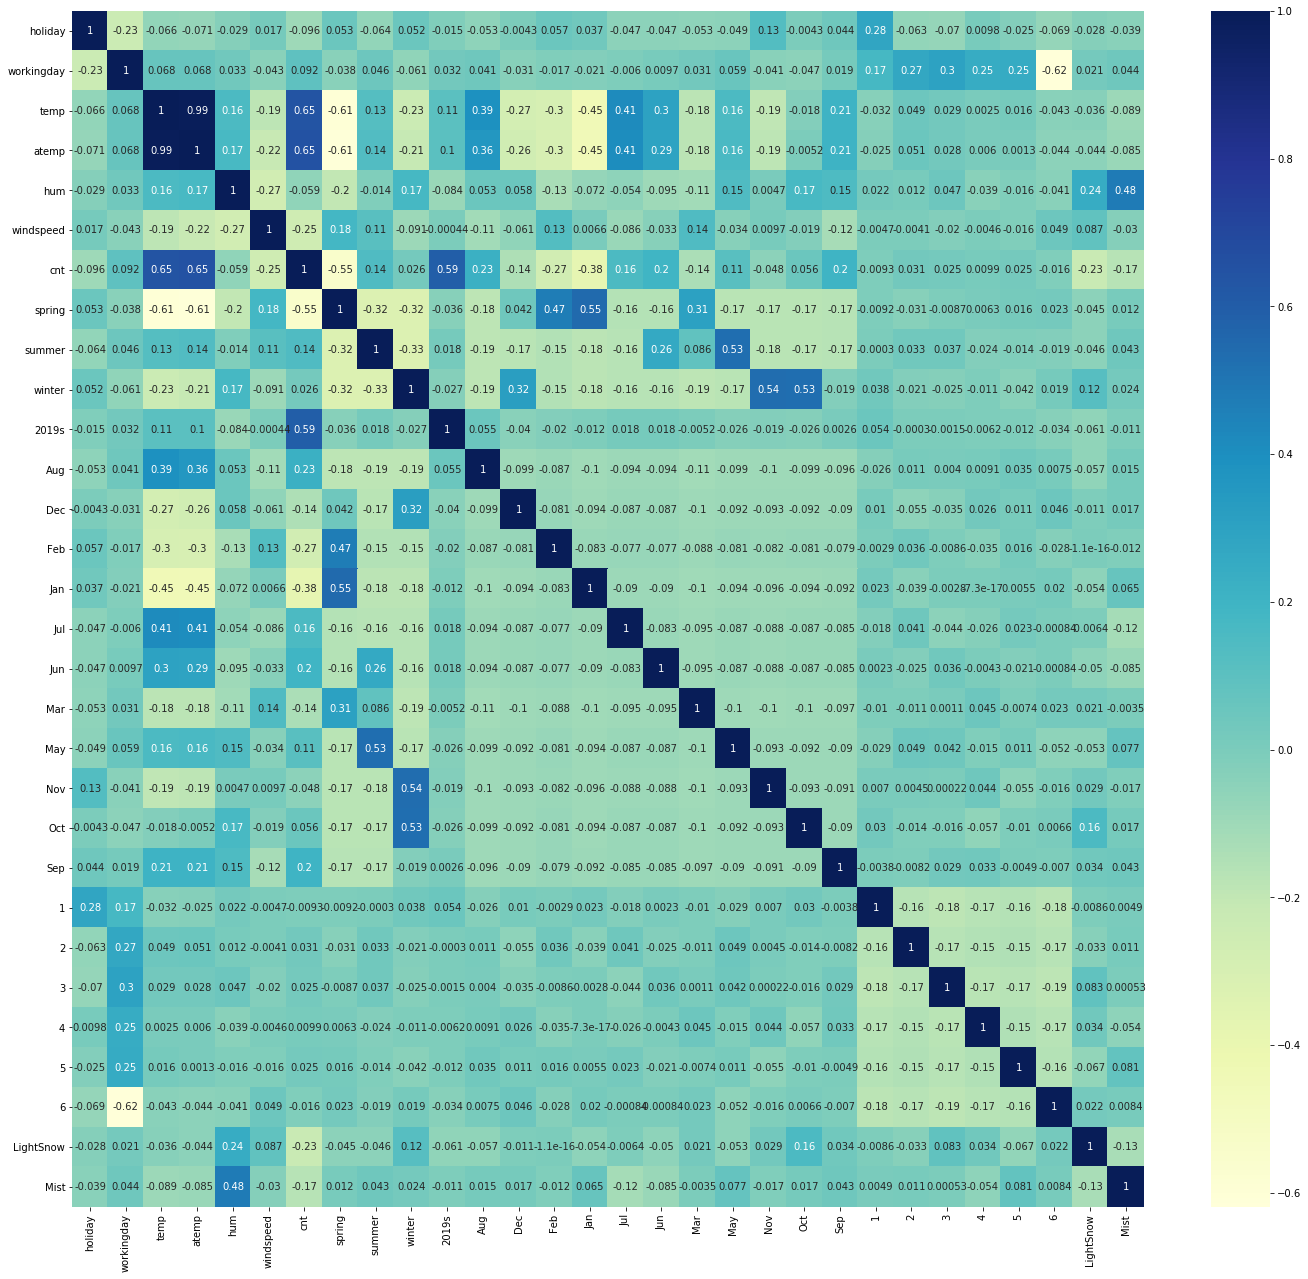

In [829]:
#heatmap
plt.figure(figsize = (24,22))
sns.heatmap(df_train.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

In [830]:
#divide the dataset df_train into X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train
print(y_train.head())
print(X_train.head())

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64
     holiday  workingday      temp     atemp       hum  windspeed  spring  \
576        0           1  0.815169  0.766351  0.725633   0.264686       0   
426        0           0  0.442393  0.438975  0.640189   0.255342       1   
728        0           0  0.245101  0.200348  0.498067   0.663106       1   
482        0           0  0.395666  0.391735  0.504508   0.188475       0   
111        0           1  0.345824  0.318819  0.751824   0.380981       0   

     summer  winter  2019s  ...  Oct  Sep  1  2  3  4  5  6  LightSnow  Mist  
576       0       0      1  ...    0    0  0  1  0  0  0  0          0     0  
426       0       0      1  ...    0    0  0  0  0  0  0  1          0     1  
728       0       0      1  ...    0    0  0  0  0  0  0  0          0     0  
482       1       0      1  ...    0    0  0  0  0  0  0  1          0     1  
111       1       0      0  ...    0

In [831]:
#using RFE technique for feature selection
#importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [832]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [833]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019s', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 11),
 ('Sep', True, 1),
 (1, False, 8),
 (2, False, 9),
 (3, False, 13),
 (4, False, 14),
 (5, False, 10),
 (6, True, 1),
 ('LightSnow', True, 1),
 ('Mist', True, 1)]

In [834]:
col = X_train.columns[rfe.support_]
col

Index([   'holiday', 'workingday',       'temp',        'hum',  'windspeed',
           'spring',     'summer',     'winter',      '2019s',        'Jan',
              'Jul',        'Sep',            6,  'LightSnow',       'Mist'],
      dtype='object')

In [835]:
#Build model using statsmodel using RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

holiday  workingday      temp       hum  windspeed  spring  summer  \
576        0           1  0.815169  0.725633   0.264686       0       0   
426        0           0  0.442393  0.640189   0.255342       1       0   
728        0           0  0.245101  0.498067   0.663106       1       0   
482        0           0  0.395666  0.504508   0.188475       0       1   
111        0           1  0.345824  0.751824   0.380981       0       1   

     winter  2019s  Jan  Jul  Sep  6  LightSnow  Mist  
576       0      1    0    1    0  0          0     0  
426       0      1    0    0    0  1          0     1  
728       0      1    0    0    0  0          0     0  
482       0      1    0    0    0  1          0     1  
111       0      0    0    0    0  0          0     1

In [836]:
# add a constant
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [837]:
# run the model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [838]:
# summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          4.22e-191
Time:                        20:36:48   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

In [839]:
# remove the Jan Value as it is having a very high p value
X_train_new = X_train_rfe.drop(["Jan"], axis = 1)

In [840]:
#Rebuild the model without Jan
#add a constant
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

In [841]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [842]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          2.11e-191
Time:                        20:36:48   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2402      0.036      6.714      0.0

In [843]:
# remove holiday as it has a high p value
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [844]:
# rebuild model without holiday
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          1.54e-191
Time:                        20:36:48   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2307      0.036      6.472      0.0

In [845]:
# remove spring as high p value
X_train_new = X_train_new.drop(["spring"], axis = 1)

In [846]:
# rebuild model without spring
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          4.14e-191
Time:                        20:36:48   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1712      0.028      6.014      0.0

In [847]:
# remove Jul as high p value
X_train_new = X_train_new.drop(["Jul"], axis = 1)

In [848]:
# rebuild model without July
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          5.10e-191
Time:                        20:36:48   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1705      0.029      5.960      0.0

In [849]:
# remove constant
X_train_new = X_train_new.drop(['const'], axis=1)

In [850]:
#Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2          hum  15.96
1         temp   8.12
0   workingday   4.53
3    windspeed   3.73
10        Mist   2.10
6        2019s   2.02
8            6   1.79
5       winter   1.66
4       summer   1.58
7          Sep   1.20
9    LightSnow   1.16

In [851]:
# remove humidity (hum) as it has high VIF
X_train_new = X_train_new.drop(['hum'], axis=1)

In [852]:
# rebuild model without hum
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          3.13e-188
Time:                        20:36:48   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.019      4.031      0.0

In [856]:
#Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1        temp  4.76
0  workingday  4.04
2   windspeed  3.44
5       2019s  2.02
7           6  1.69
3      summer  1.57
9        Mist  1.53
4      winter  1.40
6         Sep  1.20
8   LightSnow  1.08

# Residual Analysis on Train Data

In [857]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

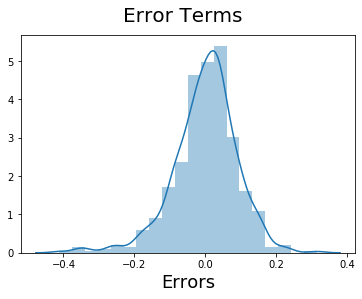

In [861]:
# Plot the histogram for the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Predictions

In [862]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [863]:
# Divide into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [864]:
# use our model to make predictions.

# Creating X_test_new dataframe by dropping variables
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [865]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

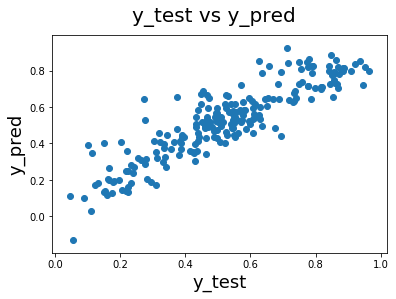

In [867]:
# Plotting y_test and y_pred to understand the data spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18) 
plt.ylabel('y_pred', fontsize=18)

In [868]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test,y_pred = y_pred)

0.7961390438459763